## Studi Kasus Employee Churn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_row", None)

In [2]:
df = pd.read_csv('employee_churn.csv')

In [3]:
df.head()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10090.0,57.48,2.0,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18652.0,41.22,2.0,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13392.0,63.57,3.0,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13356.0,46.16,2.0,bachelor/diploma,3.812226,41.454702,-81.404655,1,1


Analisis Employee Churn adalah sebuah studi terhadap tingkat 'churn' dari karyawan perusahaan. Employee (karyawan) dibilang 'Churn' ketika karyawan tersebut pindah kerja ke kantor lain (berhenti bekerja di kantor asal). Secara garis besar, perusahaan-perusahaan ingin bisa 'memprediksi' employee mana yang akan 'churn', supaya bisa melakukan antisipasi agar employee tersebut tidak jadi 'churn'. Mengapa? Karena...lebih besar ongkos yang dikeluarkan untuk mencari & merekrut karyawan baru, melatih mereka dari 0 lagi, ketimbang mempertahankan employee yang sudah ada. Oleh sebab itu, perusahaan-perusahaan ingin mempelajari faktor-faktor apa saja yang dapat dilihat untuk mengantisipasi 'churn' dari seorang employee. 


Setiap baris merepresentasi data dari seorang employee. 

Penjelasan setiap kolom:
- `office_distance_from_house`: jarak (dalam meter) kantor ke rumah karyawan
- `bonus_salary_percentage`: persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir
- `job_satisfaction`: tingkat kepuasan kerja karyawan
- `education_level`: tingkat pendidikan karyawan
- `overtime_hour`: lama waktu lembur rata-rata (dalam jam)
- `company_latitude`: koordinat garis lintang kantor pusat perusahaan
- `company_longitude`: koordinat garis bujur kantor pusat perusahaan
- `gender`: apabila 0, berarti perempuan, apabila 1, berarti laki-laki
- `churn`: apabila 1, berarti Churn (si karyawan pindah), apabila 0, berarti tidak Churn (karyawan tidak pindah)

### Soal:

1. (30 POIN) Lakukan explorasi dan visualisasi data secara bebas dan tulislah (dalam poin-poin) insights yang Anda peroleh. Berikan minimal 7 poin-poin. 
2. (20 POIN) Lakukanlah data preparation yang diperlukan (misal: mengubah kolom kategorikal menjadi kolom numerikal, dst). Tuliskanlah langkah-langkah yang Anda lakukan dalam tahap ini. 
3. (20 POIN) Tentukan False Positive dan False Negative dari kasus ini. Mana yang lebih 'penting' untuk diperhatikan? Mana yang lebih 'penting' untuk kita hindari? False Positive, atau False Negative? 
4. (30 POIN) Buatlah Machine Learning Model untuk mengklasifikasikan apakah employee akan Churn atau tidak. Kolom 'target' adalah kolom 'Churn'. Evaluasi-lah machine learning model Anda, dan tentukanlah metrik-metrik yang tepat untuk mengukur akurasi dari machine learning model tersebut. 

### Petunjuk:

1. Kerjakanlah pekerjaan kalian di bagian "Tempat Mengerjakan" (di bawah)
2. Jawablah keempat soal di atas di bagian "Jawaban". 

#### Tempat Mengerjakan:

In [4]:
# Mengubah nilai kolom office_distance_from_house yang awalnya jarak berdasarkan meter menjadi Kilo Meter agar mudah di baca dan diteliti.

# Mengubah tipe data kolom job_satisfaction menjadi int yang awalnya adalah float.

df["office_distance_from_house"] = df["office_distance_from_house"].map(lambda x:(x/1000)).round(2)
df["job_satisfaction"] = df["job_satisfaction"].astype(int)
df

# bonus distance overtime our (Dinormalisasikan baru di korelasi lagi)

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8.51,42.51,1,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10.09,57.48,2,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18.65,41.22,2,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13.39,63.57,3,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13.36,46.16,2,bachelor/diploma,3.812226,41.454702,-81.404655,1,1
5,8.64,45.40,2,masters degree,2.957464,34.646359,-95.066688,1,0
6,10.12,59.67,5,bachelor/diploma,2.166112,48.319347,-79.139183,1,0
7,6.42,81.34,2,bachelor/diploma,3.780238,43.254154,-102.259600,1,0
8,13.29,69.60,4,bachelor/diploma,3.365301,48.415643,-81.382291,1,0
9,11.87,46.46,4,masters degree,3.473618,37.755371,-73.410523,1,0


In [5]:
# Memeriksa missing value pada dataframe

print("Nilai Null Pada Masing-Masing Kolom\n")
df.isnull().sum()

Nilai Null Pada Masing-Masing Kolom



office_distance_from_house    0
bonus_salary_percentage       0
job_satisfaction              0
education_level               0
overtime_hour                 0
company_latitude              0
company_longitude             0
gender                        0
churn                         0
dtype: int64

### Point 1

In [6]:
Churn_Genre = df.groupby(['churn','gender'])['gender'].count()
Churn_Genre

churn  gender
0      0         364
       1         360
1      0         153
       1         156
Name: gender, dtype: int64

In [7]:
Tidakchurn = Churn_Genre.loc[(0)]
Churn = Churn_Genre.loc[(1)]
Churn

gender
0    153
1    156
Name: gender, dtype: int64

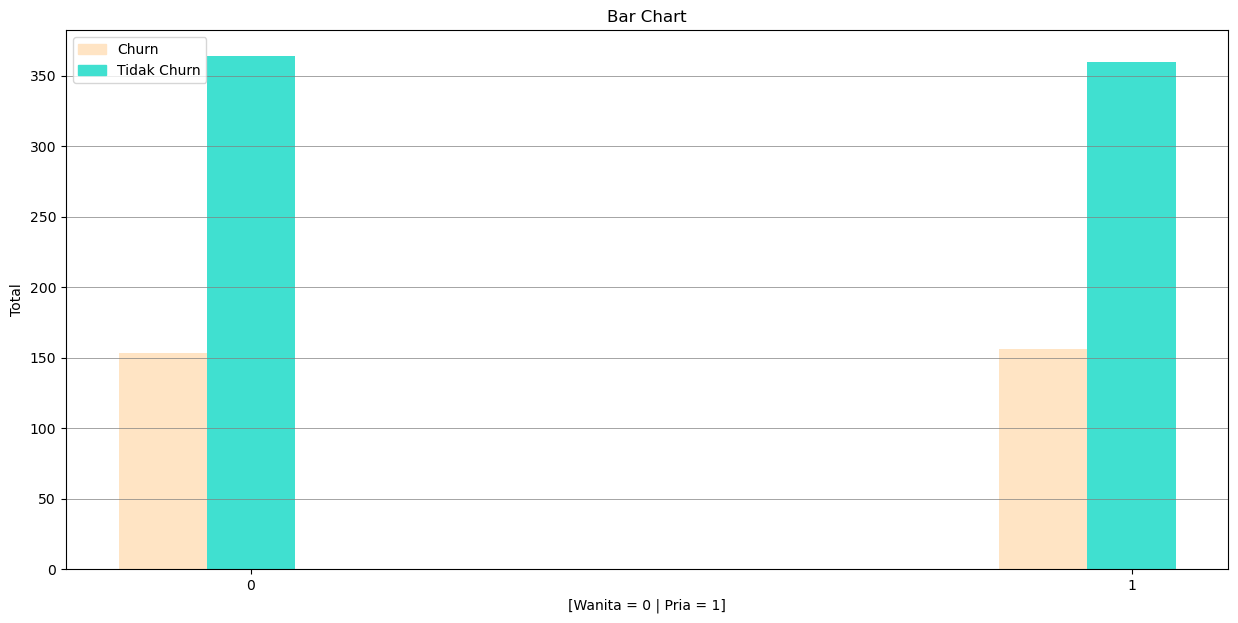

In [8]:
plt.figure(figsize=(15,7))

c=['bisque','turquoise']
width = 0.1
plt.bar(np.arange(len(Churn)), Churn, width=width, color=c[0])
plt.bar(np.arange(len(Tidakchurn))+ width, Tidakchurn, width=width, color=c[1])


plt.xticks(np.arange(len(Churn))+ width,Churn.index,horizontalalignment='center')
plt.xlabel('[Wanita = 0 | Pria = 1]')
plt.ylabel('Total')
plt.title('Bar Chart')
plt.grid(axis = 'y', linewidth=0.5, color='grey')
import matplotlib.patches as mpatches

r1 = mpatches.Patch(color='bisque',label='Churn')
r2 = mpatches.Patch(color='turquoise',label='Tidak Churn')
plt.legend(handles=[r1,r2])

plt.show()

- `Karyawan pria dan wanita memiliki perbandingan yang sama untuk pindah perusahaan. Hal ini dapat dilihat dari hampir sama nya jumlah karyawan wanita dan laki laki yang ingin pindah yaitu secara berurutan untuk wanita berjumlah 153 orang dan untuk laki laki berjumlah 156 orang.`

### Point 2 & 6

In [9]:
Prediksi_1 = df.groupby(['education_level','churn','job_satisfaction'])['job_satisfaction'].count()
Prediksi1 = Prediksi_1.to_frame()

Diploma = Prediksi1.loc[("bachelor/diploma", 0), "job_satisfaction"]
Diploma2 = Prediksi1.loc[("bachelor/diploma", 1), "job_satisfaction"]

high_school = Prediksi1.loc[("high-school", 0), "job_satisfaction"]
high_school2 = Prediksi1.loc[("high-school", 1), "job_satisfaction"]

higher_education = Prediksi1.loc[("higher education", 0), "job_satisfaction"]
higher_education2 = Prediksi1.loc[("higher education", 1), "job_satisfaction"]

masters_degree = Prediksi1.loc[("masters degree", 0), "job_satisfaction"]
masters_degree2 = Prediksi1.loc[("masters degree", 1), "job_satisfaction"]
Prediksi1

job_satisfaction
education_level  churn job_satisfaction                  
bachelor/diploma 0     0                                3
                       1                               23
                       2                               82
                       3                              173
                       4                               56
                       5                                2
                 1     0                                1
                       1                               55
                       2                              140
                       3                               16
high-school      0     2                                1
                       3                                4
                       4                                1
                 1     2                                2
higher education 0     3                               10
                 1     2                                1
masters degree   0     0                                2
                       1                               19
                       2                               93
                       3                              203
                       4                               48
                       5                                4
                 1     0                                1
                       1                               27
                       2                               64
                       3                                2

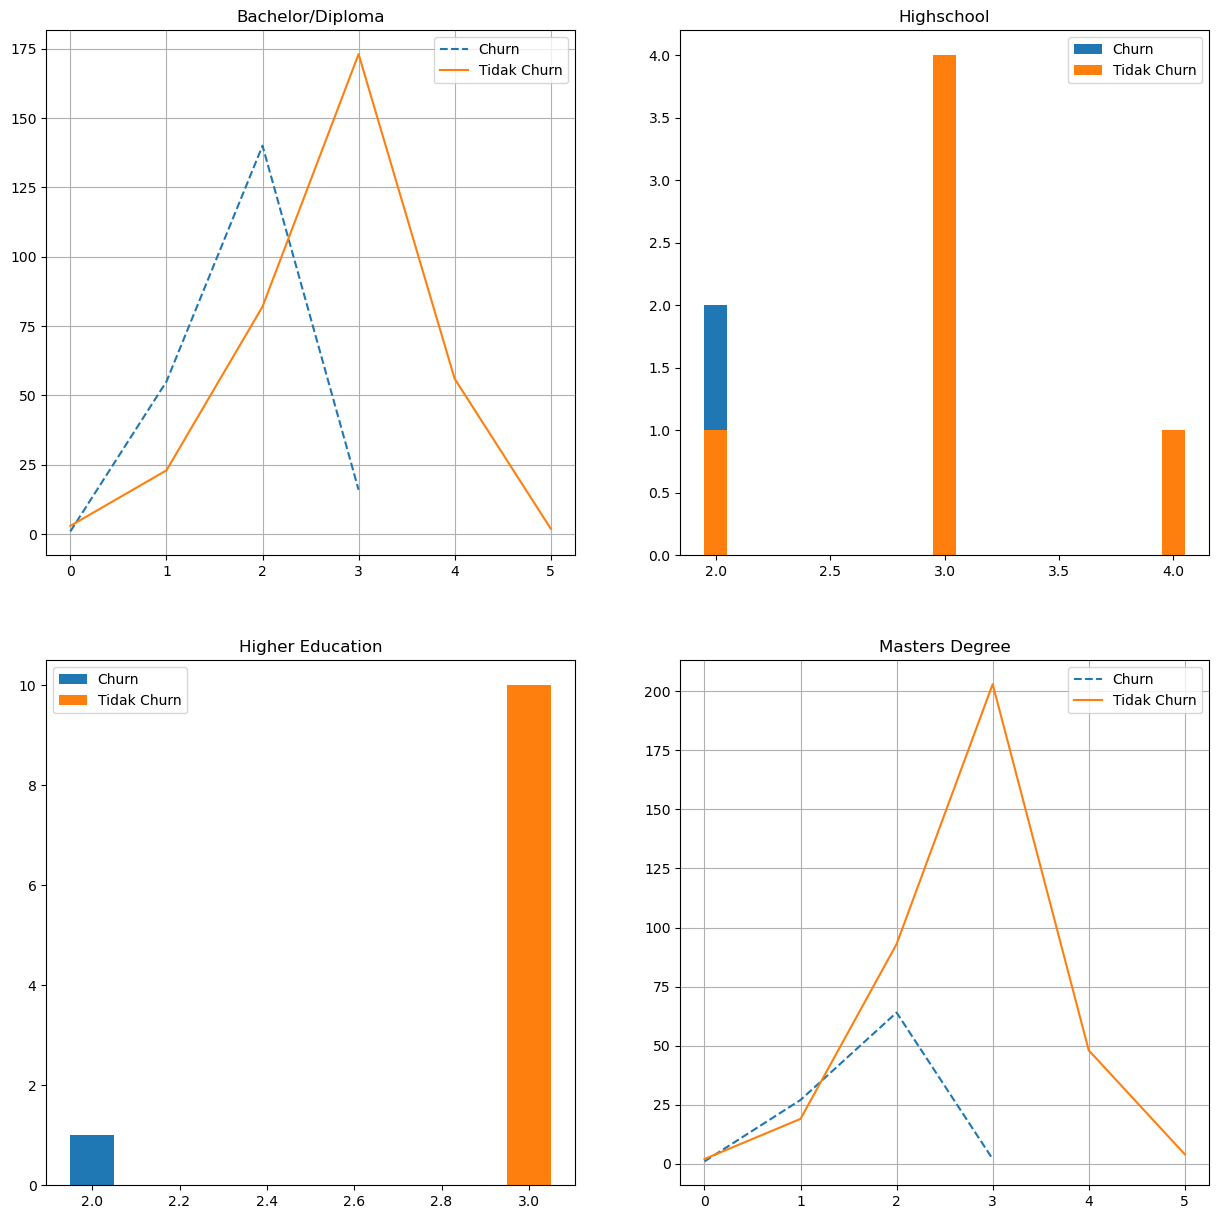

In [10]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2, figsize=(15,15))
  
# For Bachelor/Diploma
axis[0, 0].plot(Diploma2.index, Diploma2,'--',label='Churn')
axis[0, 0].plot(Diploma.index, Diploma,label='Tidak Churn')
axis[0, 0].set_title("Bachelor/Diploma")
axis[0, 0].legend()
axis[0, 0].grid()
# For Highschool
axis[0, 1].bar(high_school2.index, high_school2,label='Churn',width = 0.1)
axis[0, 1].bar(high_school.index, high_school,label='Tidak Churn',width = 0.1)
axis[0, 1].set_title("Highschool")
axis[0, 1].legend()
# For Higher Education
axis[1, 0].bar(higher_education2.index, higher_education2,label='Churn',width = 0.1)
axis[1, 0].bar(higher_education.index, higher_education,label='Tidak Churn',width = 0.1)
axis[1, 0].set_title("Higher Education")
axis[1, 0].legend()
# For Masters Degree
axis[1, 1].plot(masters_degree2.index, masters_degree2,'--',label='Churn')
axis[1, 1].plot(masters_degree.index, masters_degree,label='Tidak Churn')
axis[1, 1].set_title("Masters Degree")
plt.legend()
axis[1, 1].grid()
# Combine all the operations and display

plt.show()

- `Karyawan pada tingkat pendidikan bachelor/diploma memiliki kecenderungan ingin pindah. Hal ini dapat dilihat dari visualisasi berdasarkan education_level terhadap job_satisfaction bahwa sebanyak 212 dari 551 karyawan pada tingkat pendidikan bachelor/diploma ingin pindah lebih besar daripada tingkat pendidikan lainnya dimana pada tingkat master degree sebanyak 94 dari 463, tingkat higher education sebanyak 1 dari 11, dan tingkat high-school sebanyak 1 dari 8 karyawan yang ingin pindah.`
- `Karyawan yang ingin churn rata rata memilih tingkat kepuasan 2 dan karyawan yang tidak churn rata rata memilih tingkat kepuasan 3. Hal ini dapat dilihat dari keempat visualisasi berdasarkan education_level terhadap job_satisfaction bahwa rata rata memilih memilih kepuasan 3 adalah karyawan yang ingin churn dan rata rata memilih memilih kepuasan 2 adalah karyawan yang tidak ingin churn.`

### Point 3,4,5

In [11]:
# churn office_distance_from_house bonus_salary_percentage overtime_hour

Coba3 = df.groupby('churn', as_index=False)['office_distance_from_house','bonus_salary_percentage','overtime_hour'].mean()
Coba3

C:\Users\rendi\AppData\Local\Temp\ipykernel_18936\1673655640.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Coba3 = df.groupby('churn', as_index=False)['office_distance_from_house','bonus_salary_percentage','overtime_hour'].mean()


,churn,office_distance_from_house,bonus_salary_percentage,overtime_hour
0,0,10.137514,56.223785,3.083782
1,1,12.258350,42.522071,3.071544


In [12]:
Coba3 = Coba3.T
Coba3.apply(lambda x:x.round(2))
Coba3.drop('churn', inplace = True)
Coba3

,0,1
office_distance_from_house,10.137514,12.258350
bonus_salary_percentage,56.223785,42.522071
overtime_hour,3.083782,3.071544


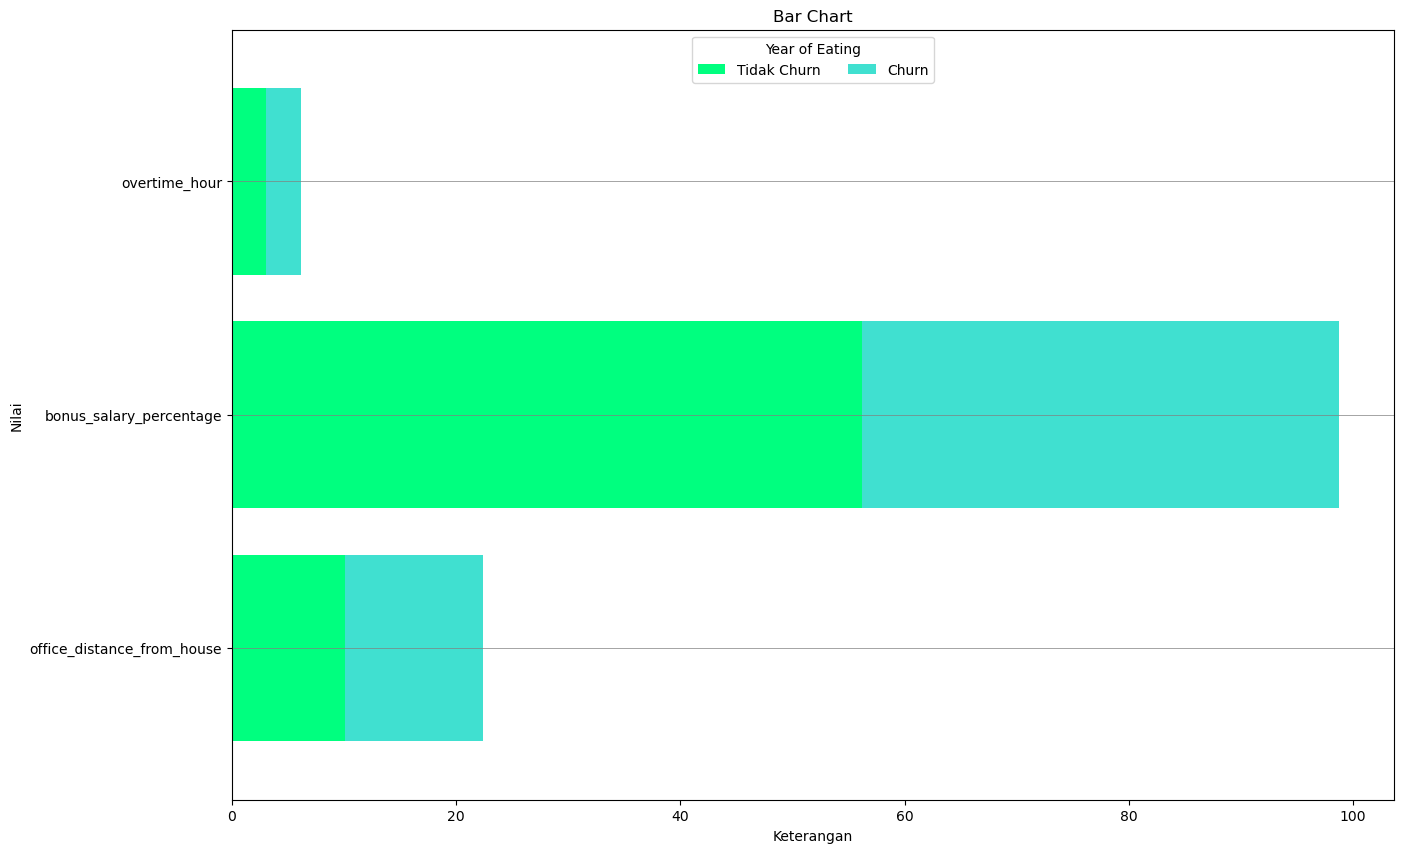

In [13]:
#Tunjukkan dalam bentuk persennya perdata


# plt.style.use('ggplot')
Coba3.plot(kind='barh', stacked=True,figsize = (15,10),color = ["springgreen","turquoise"],
        title='Bar Chart',xlabel = "Keterangan",ylabel = "Nilai",width = 0.8).legend(['Tidak Churn','Churn'],loc='upper center', ncol=2, title="Year of Eating")
plt.grid(axis = 'y', linewidth=0.5, color='grey')

- `Dapat diprediksi bahwa karyawan yang jarak rumah nya jauh dari perusahaan memiliki kecenderungan yang lebih tinggi untuk pindah perusahaan. Hal ini dapat dilihat dari perbandingan jarak rumah karyawaan yang ingin churn lebih jauh dengan rata rata 12,258350 km daripada jarak rumah karyawan yang tidak churn lebih dekat dengan rata rata 10,137514 km.`
- `Karyawan yang mendapatkan bonus yang lebih sedikit memiliki kecenderungan yang lebih tinggi untuk pindah perusahaan. Hal ini dapat dapat dilihat dari persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir dimana persetase bonus gaji karyawan yang ingin pindah dengan rata rata 42,522071 lebih kecil daripada yang tidak pindah dengan rata rata 56,223785`
- `Karyawan yang ingin churn dan tidak churn memiliki lama waktu lembur rata-rata hampir sama, padahal karyawan yang churn mendapatkan bonus yang lebih sedikit dan jarak rumahnya lebih jauh daripada yang tidak churn. Dapat dilihat dari rata rata lama waktu lemburnya hampir sama antara karyawan yang ingin churn dengan 3,071544 jam dan tidak churn 3,083782 jam.`

### Point 7

In [14]:
Lembur = df.groupby(['job_satisfaction'])['overtime_hour'].mean()
Lembur = Lembur.round(2)

Bonus = df.groupby(['job_satisfaction'])['bonus_salary_percentage'].mean()
Bonus = Bonus.round(2)
Bonus

job_satisfaction
0    53.49
1    47.82
2    50.85
3    54.03
4    54.11
5    57.00
Name: bonus_salary_percentage, dtype: float64

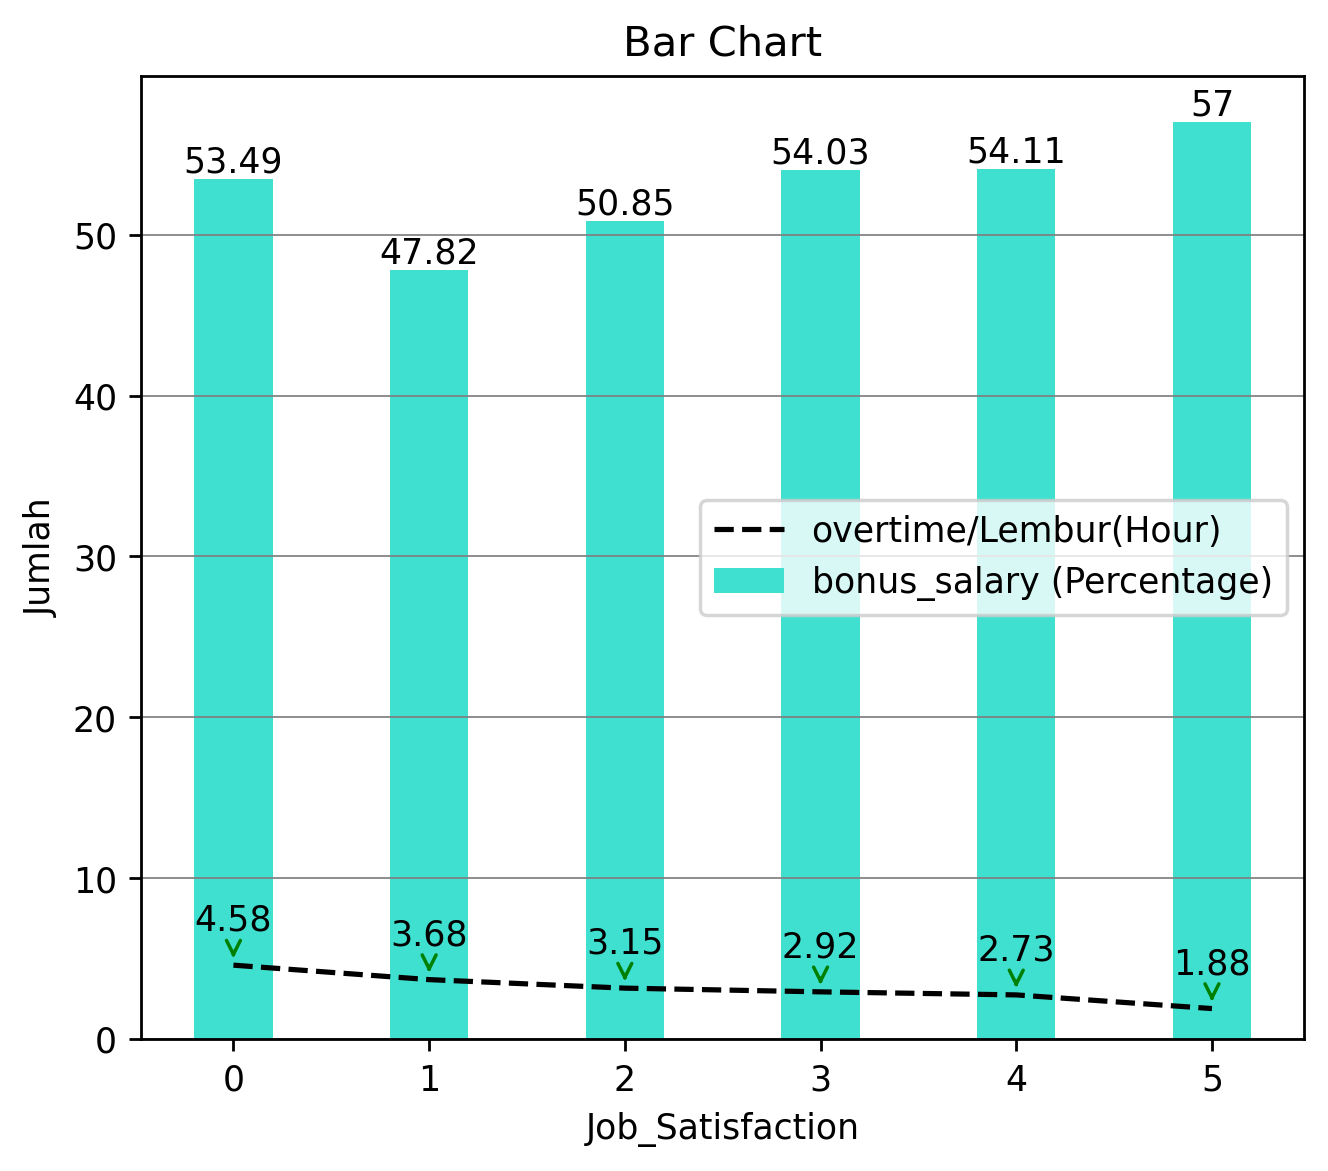

In [15]:
fig, ax = plt.subplots( figsize=(6,5), dpi = 250)

Satu = ax.plot(Bonus.index,Lembur,linestyle = '--', color ='Black', label = "overtime/Lembur(Hour)")
Dua = ax.bar(Bonus.index,Bonus, width=0.4, color = ['turquoise'], label = "bonus_salary (Percentage)")
ax.bar_label(Dua)
plt.grid(axis = 'y', linewidth=0.5, color='grey')

for x,y in zip(Bonus.index,Lembur):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the value which we want to label (text)
                 (x,y), # x and y is the points location where we have to label
                 textcoords="offset points",
                 xytext=(0,10), # this for the distance between the points
                 # and the text label
                 ha='center',
                 arrowprops=dict(arrowstyle="->", color='green'))

ax.set_xlabel('Job_Satisfaction')
ax.set_ylabel('Jumlah')
ax.set_title('Bar Chart')
ax.legend(["overtime/Lembur(Hour)","bonus_salary (Percentage)"], loc = 7)
plt.show()

- `Karyawan dengan tingkat kepuasan 0,1 dan 2 memiliki jam lembur kerja lebih banyak tetapi mereka mendapatkan persentasase bonus gaji lebih sedikit . Hal yang didapat dari visualisasi berdasarkan job_satisfaction dan overtime/lembur dengan tingkat kepuasan 0 memiliki rata rata jam lembur kerja 4,58 jam dan persentasae bonus gaji 53,49% jika dibandingkan dengan tingkat kepuasan 5 pastinya sangat berbanding terbalik dimana rata rata jam lembur kerja nya lebih sedikit yaitu 1,88% dengan persentasae bonus gaji yang paling banyak yaitu 57%.`

### Point 8

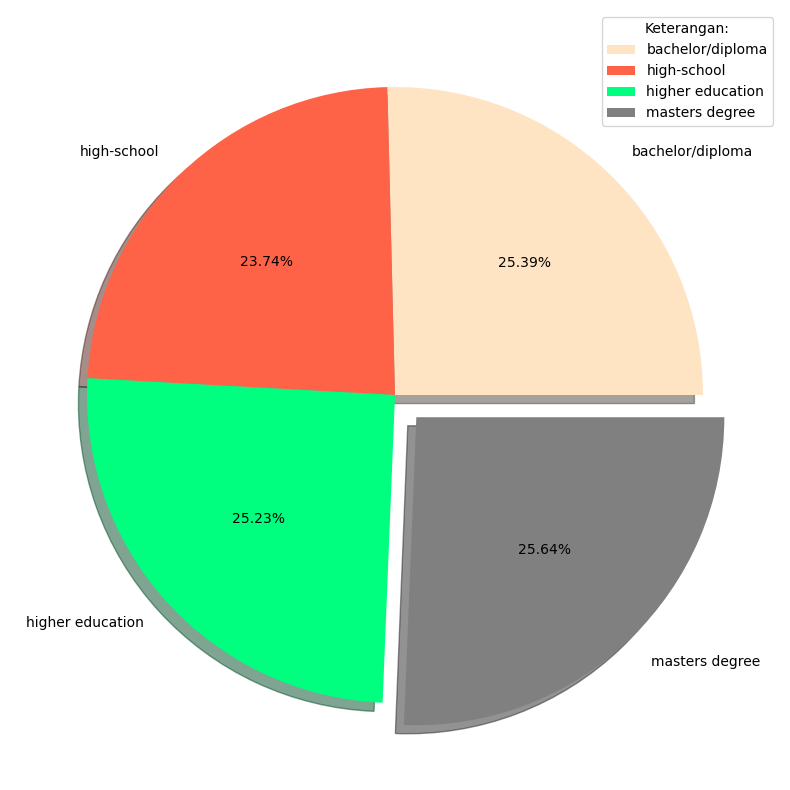

In [16]:
# Rata-Rata Lembur kerja per Education level

testgroupby2 = df.groupby(['education_level'])['overtime_hour'].mean()
testgroupby2 = testgroupby2.round(2)
testgroupby2

plt.figure(figsize=(10,10))
myexplode = [0, 0, 0, 0.1]
plt.pie(testgroupby2, labels = testgroupby2.index,
        autopct = '%1.2f%%',
        colors=['bisque','tomato','springgreen','grey'], explode = myexplode, shadow = True)
plt.legend(title = "Keterangan:")
plt.show()

- `Karyawan dengan tingkat pendidikan master degree memiliki persentase jam lembur kerja lebih besar. Hal ini didapat dari visualisasi education_level dan overtime/lembur dimana tingkat master degree mendapatkan persentase sebesar 25,64% dalam jam lembur kerja.`

### Point 9

In [17]:
# Mengetahui banyaknya karyawan yang pindah dan tidak pindah

Insight = df['churn'].value_counts()
Insight
Insight_df = pd.DataFrame(Insight)
Insight_df = Insight_df.set_index(pd.Index (['Tidak Churn', 'Churn']))
Insight_df

,churn
Tidak Churn,724
Churn,309


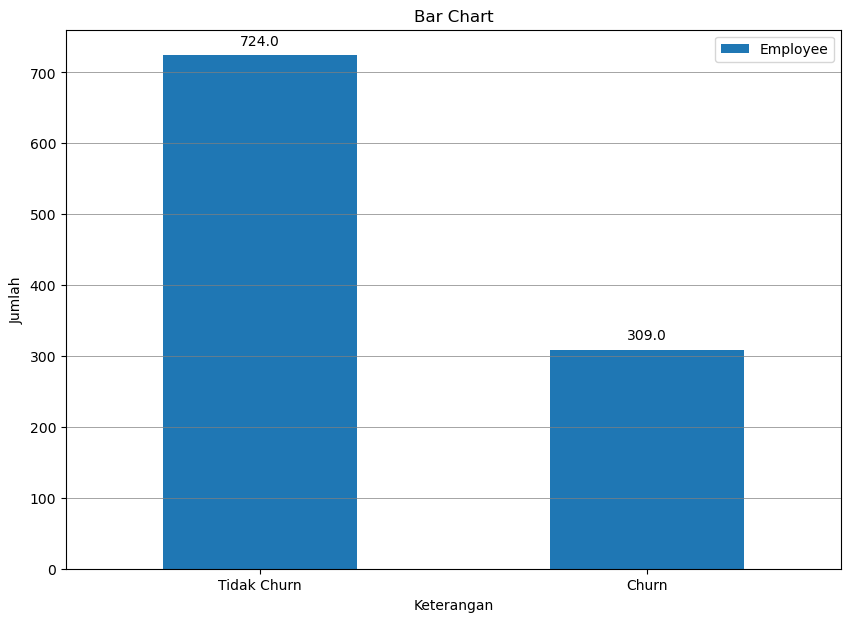

In [18]:
def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)
        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


frequencies = [724, 309]
# Plot the figure.
ax = Insight_df.plot(kind='bar',figsize = (10,7))
plt.xticks(rotation = 'horizontal')
plt.grid(axis = 'y', linewidth=0.5, color='grey')
ax.set_title('Bar Chart')
ax.set_xlabel('Keterangan')
ax.set_ylabel('Jumlah')
ax.legend(["Employee"])
            
add_value_labels(ax)



- `Karyawan yang tidak churn lebih banyak dari pada yang churn,. Hal ini didapatkan dari viualisasi berdasarkan churn dimana jumlah karyawan yang churn sebesar 309 orang dan tidak churn sebesar 724 orang.`

### Jawaban:

#### Nomor 1.

Berikut adalah insights yang kami temukan:
1. Karyawan pria dan wanita memiliki perbandingan yang sama untuk pindah perusahaan. Hal ini dapat dilihat dari hampir sama nya jumlah karyawan wanita dan laki laki yang ingin pindah yaitu secara berurutan untuk wanita berjumlah 153 orang dan untuk laki laki berjumlah 156 orang.
2. Karyawan pada tingkat pendidikan bachelor/diploma memiliki kecenderungan ingin pindah. Hal ini dapat dilihat dari visualisasi berdasarkan education_level terhadap job_satisfaction bahwa sebanyak 212 dari 551 karyawan pada tingkat pendidikan bachelor/diploma ingin pindah lebih besar daripada tingkat pendidikan lainnya dimana pada tingkat master degree sebanyak 94 dari 463, tingkat higher education sebanyak 1 dari 11, dan tingkat high-school sebanyak 1 dari 8 karyawan yang ingin pindah.
3. Dapat diprediksi bahwa karyawan yang jarak rumah nya jauh dari perusahaan memiliki kecenderungan yang lebih tinggi untuk pindah perusahaan. Hal ini dapat dilihat dari perbandingan jarak rumah karyawaan yang ingin churn lebih jauh dengan rata rata 12,258350 km daripada jarak rumah karyawan yang tidak churn lebih dekat dengan rata rata 10,137514 km. 
4. Karyawan yang mendapatkan bonus yang lebih sedikit memiliki kecenderungan yang lebih tinggi untuk pindah perusahaan. Hal ini dapat dapat dilihat dari persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir dimana persetase bonus gaji karyawan yang ingin pindah dengan rata rata 42,522071  lebih kecil daripada yang tidak pindah dengan rata rata 56,223785
5. Karyawan yang ingin churn dan tidak churn memiliki lama waktu lembur rata-rata hampir sama, padahal karyawan yang churn mendapatkan bonus yang lebih sedikit dan jarak rumahnya lebih jauh daripada yang tidak churn. Dapat dilihat dari rata rata lama waktu lemburnya hampir sama antara  karyawan yang ingin churn dengan 3,071544 jam dan tidak churn 3,083782 jam. 
6. Karyawan yang ingin churn rata rata memilih tingkat kepuasan 2 dan karyawan yang tidak churn rata rata memilih tingkat kepuasan 3. Hal ini dapat dilihat dari keempat visualisasi berdasarkan education_level terhadap job_satisfaction bahwa rata rata memilih memilih kepuasan 3 adalah karyawan yang ingin churn dan rata rata memilih memilih kepuasan 2 adalah karyawan yang tidak ingin churn. 
7. Karyawan dengan tingkat kepuasan 0,1 dan 2 memiliki jam lembur kerja lebih banyak tetapi mereka mendapatkan persentasase bonus gaji lebih sedikit . Hal yang didapat dari visualisasi berdasarkan  job_satisfaction dan overtime/lembur dengan tingkat kepuasan 0 memiliki rata rata jam lembur kerja 4,58 jam dan persentasae bonus gaji 53,49% jika dibandingkan dengan tingkat kepuasan 5 pastinya sangat berbanding terbalik dimana  rata rata jam lembur kerja nya lebih sedikit yaitu 1,88% dengan persentasae bonus gaji yang paling banyak yaitu 57%. 
8. Karyawan dengan tingkat pendidikan master degree memiliki persentase jam lembur kerja lebih besar. Hal ini didapat dari visualisasi education_level dan overtime/lembur dimana tingkat master degree mendapatkan persentase sebesar 25,64% dalam  jam lembur kerja. 
9. Karyawan yang tidak churn lebih banyak dari pada yang churn,. Hal ini didapatkan dari viualisasi berdasarkan churn dimana jumlah karyawan yang churn sebesar 309 orang dan tidak churn sebesar 724 orang. 
10. Faktor-faktor yang menyebabkan karyawan ingin churn berdasarkan insight yang ditemukan adalah jauh nya jarak kantor ke rumah karyawan dan rendahnya bonus yang diberikan kepada karyawan dengan rata rata jam lembur kerja yang lebih besar sehingga mempengaruhi tingkat kepuasaan karyawan dan keinginannya untuk tidak churn dari perusahaan.
11. Untuk mengantisipasi agar employee tersebut tidak jadi 'churn', hal yang dapat dilakukan perusahaan adalah mempertimbangkan memberi bonus yang lebih besar kepada karyawan yang jam lembur kerjanya lebih besar; memberikan pilihan kepada karyawan yang rumah nya jauh apakah ingin bekerja fulltime atau bekerja secara shifting dalam beberapa hari tertentu; memberikan pelatihan gratis yang bersertifikat kepada karyawan atau bimbingan kepada karyawan  serta merangkul karyawan sehingga tingkat kepuasaan lebih besar dan karyawan ingin tetap bertahan bekerja dalam perusahaan; meningkatkan fasilitas perusahaan seperti menyediakan air minum di ruang kerja, makanan ringan untuk menunda lapar, alat tulis kerja , serta sarana dan prasarana lainnya yang menunjang pekerjaan karyawan. Hal ini dapat dipertimbangkan untuk dilakukan perusahaan untuk dapat mempertahankan karyawan agar tidak churn karena lebih besar ongkos yang dikeluarkan untuk mencari & merekrut karyawan baru, melatih mereka dari 0 lagi, ketimbang mempertahankan employee yang sudah ada.

#### Nomor 2.

- Kami melakukan pembagian pada dataset menjadi dua jenis yaitu data fitur dan juga data target karena untuk kebutuhan modeling dibutuhkan data x(data fitur) dan data y(data target).

- Kemudian, kami mengambil kolom ke-0 samapi ke-5 + kolom gender sebagai data fitur untuk company_latitude dan company_longitude tidak digunakan, karena valuenya hanya untuk menentukan lokasi company dan yang sebenarnya sudah diwakilkan oleh kolom office_distance_from_house.

- Untuk y (data target) kami menggunakan kolom churn karena yang ingin diprediksi adalah kemungkinan churn atau tidak dari employee. Data target ini menunjukkan adanya kelas biner yaitu 1 = churn dan 0 = tidak churn.

- Kami melakukan pembagian data menjadi data latih dan data uji. data latih digunakan untuk melatih algoritma machine learning untuk mendapatkan model klasifikasi, sedangkan data uji digunakan untuk menguji performansi model terhadap beberapa matrix uji. Pembagian data latih sebesar 70% dari data total. sedangkan untuk data uji sebesar 30% dari data total. Dari hasil pembagian data tersebut kami mendapatkan 2 variabel(xtrain,ytrain) untuk melatih algoritma dan 2 variabel(xtest,ytest) untuk menguji algoritma.

In [19]:
df.head()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8.51,42.51,1,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10.09,57.48,2,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18.65,41.22,2,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13.39,63.57,3,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13.36,46.16,2,bachelor/diploma,3.812226,41.454702,-81.404655,1,1


In [20]:
#Data Fitur
x = df.iloc[:,0:5]
x["gender"] = df["gender"]

x["education_level"] = x['education_level'].replace({'higher education' : 3,'masters degree': 2,'bachelor/diploma' :1, 'high-school' : 0})
x

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,gender
0,8.51,42.51,1,1,3.416556,0
1,10.09,57.48,2,1,2.897149,0
2,18.65,41.22,2,1,3.180264,1
3,13.39,63.57,3,1,3.429648,0
4,13.36,46.16,2,1,3.812226,1
5,8.64,45.40,2,2,2.957464,1
6,10.12,59.67,5,1,2.166112,1
7,6.42,81.34,2,1,3.780238,1
8,13.29,69.60,4,1,3.365301,1
9,11.87,46.46,4,2,3.473618,1


In [21]:
#Data Target
y = df['churn']

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split (x,y,test_size = 0.3, random_state = 7)
xtrain.shape

(723, 6)

#### Nomor 3.

- False Positive dari kasus ini adalah Employee yang seharusnya churn akan tetapi model prediksi menyatakan bahwa dia tidak churn.
- False Negative dari kasus ini adalah Employee yang seharusnya tidak churn akan tetapi model prediksi menyatakan bahwa dia churn.
- Dalam kasus ini, tipe 'kesalahan' yang lebih penting untuk diperhatikan adalah False Negative karena Perushaan ingin memprediksi employee mana yang akan churn sehingga dapat mengantisipasi agar employee tersebut tidak jadi 'churn'. Semakin tinggi nilai False Negative maka akan semakin banyak employee yang diprediksi churn.

#### Nomor 4.

- Kami menggunakan Machine Learning Model: XGBOOST(Xtreme Gradient Boosting), SVM(Support Vector Machine).

- Pengertian-pengertian Model-nya :
1. XGBoost adalah implementasi open-source yang populer dan efisien dari algoritma gradient tree boosting. Gradient boosting adalah algoritma pembelajaran yang diawasi, yang mencoba untuk secara akurat memprediksi variabel target dengan menggabungkan perkiraan satu set model yang lebih sederhana dan lebih lemah.
2. SVM adalah seperangkat metode pembelajaran terawasi yang digunakan untuk klasifikasi, regresi, dan deteksi outlier. Keuntungan dari SVM adalah efektif dalam ruang dimensi tinggi. Masih efektif dalam kasus di mana jumlah dimensi lebih besar dari jumlah sampel.

- Untuk mengevaluasi model tersebut, kami menggunakan metrik: Accuracy, Recall, ROC(Receiver Operating Characteristics).

- Pengertian-pengertian metrik-nya :
1. Accuracy merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.
2. Recall (Sensitifitas) merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif.
3. ROC(Receiver Operating Characteristics) adalah semacam alat ukur performance untuk classification problem dalam menentukan threshold dari suatu model.

- Hasil evaluasi dari model tersebut adalah sebagai berikut:
    - XGBOOST:
        - Accuracy : 0.8774193548387097
        - Recall : 0.7307692307692307
        - ROC : 0.8287466843501327
    - SVM :
        - Accuracy : 0.7709677419354839
        - Recall : 0.08974358974358974
        - ROC : 0.5448717948717948
        
- Berdasarkan model XGBOOST kami mencari fitur-fitur yang dianggap penting untuk membangun model klasifikasi. Model XGBoost menyediakan fungsi bawaan untuk memplot fitur yang diurutkan berdasarkan kepentingannya. Kami menggunakan Feature importance dari model XGBOOST, dimana fungsi Feature importance adalah untuk mengetahui fitur mana yang sangat berpengaruh dalam permasalahan yang sedang dicari. Dari penggunaan Feature importance  tersebut didapat Job satisfaction  adalah suatu Feature yang sangat penting untuk kita memprediksi apakah employee akan churn atau tidak.

Maka disini bisa kami simpulkan setelah membandingkan dan evaluasi keduanya dengan banyak faktor yakni memeriksa Recall, Accuracy dan juga ROC bahwa

In [23]:
pip install xgboost

In [24]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from xgboost import plot_importance
svm_model = SVC(C = 0.05, kernel = 'rbf', probability = True)
xgb_model = XGBClassifier(learning_rate = 0.05,n_estimators = 100, max_depth = 8, gamma = 1)
eval_set_over = [(xtrain,ytrain),(xtest,ytest)]

In [25]:
model_svm = svm_model.fit(xtrain,ytrain)
model_xgb = xgb_model.fit(xtrain,ytrain,eval_metric = ['error','logloss'],eval_set = eval_set_over,verbose = True)

[0]	validation_0-error:0.06501	validation_0-logloss:0.65648	validation_1-error:0.12581	validation_1-logloss:0.66050
[1]	validation_0-error:0.06224	validation_0-logloss:0.62337	validation_1-error:0.12581	validation_1-logloss:0.63093
[2]	validation_0-error:0.06224	validation_0-logloss:0.59327	validation_1-error:0.12581	validation_1-logloss:0.60424
[3]	validation_0-error:0.06501	validation_0-logloss:0.56564	validation_1-error:0.12258	validation_1-logloss:0.58004
[4]	validation_0-error:0.06224	validation_0-logloss:0.54019	validation_1-error:0.12581	validation_1-logloss:0.55831
[5]	validation_0-error:0.06362	validation_0-logloss:0.51680	validation_1-error:0.12258	validation_1-logloss:0.53803
[6]	validation_0-error:0.06362	validation_0-logloss:0.49506	validation_1-error:0.12258	validation_1-logloss:0.51990
[7]	validation_0-error:0.06224	validation_0-logloss:0.47465	validation_1-error:0.11935	validation_1-logloss:0.50253
[8]	validation_0-error:0.06086	validation_0-logloss:0.45574	validation_1

C:\Users\rendi\anaconda3\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-error:0.03596	validation_0-logloss:0.15795	validation_1-error:0.11613	validation_1-logloss:0.28249
[51]	validation_0-error:0.03596	validation_0-logloss:0.15592	validation_1-error:0.11613	validation_1-logloss:0.28195
[52]	validation_0-error:0.03458	validation_0-logloss:0.15398	validation_1-error:0.11613	validation_1-logloss:0.28114
[53]	validation_0-error:0.03596	validation_0-logloss:0.15212	validation_1-error:0.11613	validation_1-logloss:0.28084
[54]	validation_0-error:0.03596	validation_0-logloss:0.15036	validation_1-error:0.11613	validation_1-logloss:0.28016
[55]	validation_0-error:0.03596	validation_0-logloss:0.14827	validation_1-error:0.11613	validation_1-logloss:0.28031
[56]	validation_0-error:0.03596	validation_0-logloss:0.14678	validation_1-error:0.11613	validation_1-logloss:0.27955
[57]	validation_0-error:0.03596	validation_0-logloss:0.14458	validation_1-error:0.11613	validation_1-logloss:0.27886
[58]	validation_0-error:0.03596	validation_0-logloss:0.14270	val

### Accuracy

In [26]:
y_prediction_svm = model_svm.predict(xtest)
print(metrics.accuracy_score(ytest,y_prediction_svm))

y_prediction_xgb = model_xgb.predict(xtest)
print(metrics.accuracy_score(ytest,y_prediction_xgb))

0.7709677419354839
0.8774193548387097


Metriks Accuracy diatas adalah milik dari model machine learning SVM dan XGB. Accuracy adalah metriks yang digunakan dalam masalah klasifikasi pemodelan yang digunakan untuk memberi tahu persentase prediksi yang akurat. Kami menghitungnya dengan membagi jumlah test atau prediksi yang benar dengan jumlah total prediksi. Dan didpatkan hasilnya yang lebih baik adalah XGBOOST dengan score 0.8774193548387097 dan milik SVM yang hanya di score 0.7709677419354839.


### Recall

In [27]:
print(metrics.recall_score(ytest,y_prediction_svm))
print(metrics.recall_score(ytest,y_prediction_xgb))

0.08974358974358974
0.7307692307692307


Metriks Recall diatas adalah milik dari model machine learning SVM dan XGB. Accuracy adalah metriks yang digunakan dalam masalah klasifikasi pemodelan yang digunakan untuk memberi tahu persentase prediksi yang akurat. Kami menghitungnya dengan membagi jumlah test atau prediksi yang benar dengan jumlah total prediksi. Dan didpatkan hasilnya yang lebih baik adalah XGBOOST dengan score 0.8774193548387097 dan milik SVM yang hanya di score 0.7709677419354839.

### Precision

In [28]:
print(metrics.precision_score(ytest,y_prediction_svm))
print(metrics.precision_score(ytest,y_prediction_xgb))

1.0
0.7702702702702703


Secara definisi, precision adalah perbandingan antara True Positive (TP) dengan banyaknya data yang diprediksi positif. Atau bisa juga dituliskan secara matemetis: precision = TP/(TP+FP). precision score dari model SVM medapat score 1.0 dan untuk XGB mendapatkan score 0.7702702702702703.

kalau kita lihat kedua persamaan di atas dan membandingkannya. Kita seharusnya melihat, adanya satu perbedaan di antara keduanya, precision punya variabel False Positive (FP) sedangkan recall punya variabel False Negative (FN).

Dan juga dari persamaannya, kita tahu, semakin kecil False Positive (FP), membuat precision semakin besar. Sedangkan untuk recall, semakin kecil False Negative (FN) membuat recall semakin besar.

Karena yang paling diperhatikan dan dihindari pada studi kasus ini adalah false negatif (karyawan yang diprediksi tidak churn tapi kenyataannya churn) maka matrix yang paling tepat digunakan adalah matrix recall

### ROC AUC

In [29]:
print(metrics.roc_auc_score(ytest,y_prediction_svm))
print(metrics.roc_auc_score(ytest,y_prediction_xgb))

0.5448717948717948
0.8287466843501327


ROC (Receiver Operating Characteristics) adalah semacam alat ukur performance untuk classification problem dalam menentukan threshold dari suatu model. Hasil score ROC berdasarkan prediksi svm adalah 0.5214285714285715. berdasarkan prediksi xgb adalah 0.9098540145985401 sehingga score ROC paling besar menentukan confusion matrix yang paling tepat pada suatu percobaan tertentu

### Confusion

In [30]:
confusion_matrix(ytest,y_prediction_svm)

array([[232,   0],
       [ 71,   7]], dtype=int64)

Pada confusion matrix svm didapatkan nilai pada true positive nya adalah 232, true negative nya adalah 0, false negatif nya adalah 71, dan false positive nya adalah 7

In [31]:
confusion_matrix(ytest,y_prediction_xgb)

array([[215,  17],
       [ 21,  57]], dtype=int64)

Pada confusion matrix xgboost didapatkan nilai pada true positive nya adalah 215, true negative nya adalah 17, false negatif nya adalah 21, dan false positive nya adalah 57

Karena pada studi kasus ini yang paling perlu diperhatikan dan dihindari ada false negative, maka kita perlu menggunakan matrix dengan nilai false negative terendah. Maka yang paling tepat digunakan adalah confusion metriks xgboost

In [32]:
y_svm_prob = model_svm.predict_proba(xtest)
y_svm_prob = y_svm_prob[:,1]

y_xgb_prob = model_xgb.predict_proba(xtest)
y_xgb_prob = y_xgb_prob[:,1]

In [33]:
fprsvm,tprsvm,thresholds_svm = metrics.roc_curve(ytest,y_svm_prob)
fprxgb,tprxgb,thresholds_xgb = metrics.roc_curve(ytest,y_xgb_prob)

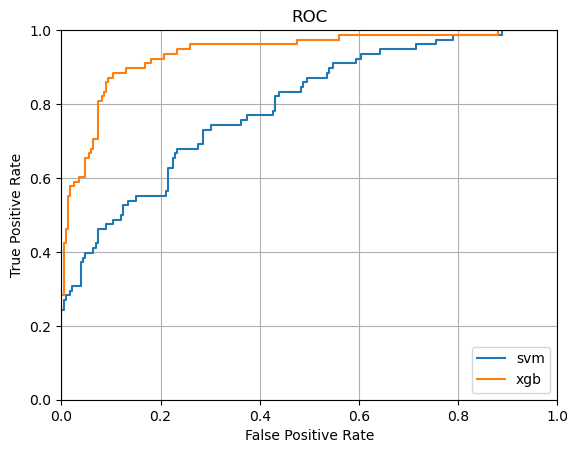

In [34]:
plt.plot(fprsvm,tprsvm, label = 'svm')
plt.plot(fprxgb,tprxgb, label = 'xgb')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc = "lower right")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

Kurva ROC digunakan untuk menampilkan tingkat true positive rate pada sumbu Y, dan tingkat false positive rate pada sumbu X. Pengklasifikasi yang memberikan kurva lebih dekat ke sudut kiri atas menunjukkan kinerja yang lebih baik. pada grafik di atas dapat diperhatikan bahwa ROC milik XGB lah yang paling mendekati angka 1 dibanding milik SVM. 

Text(0, 0.5, 'F_Score')

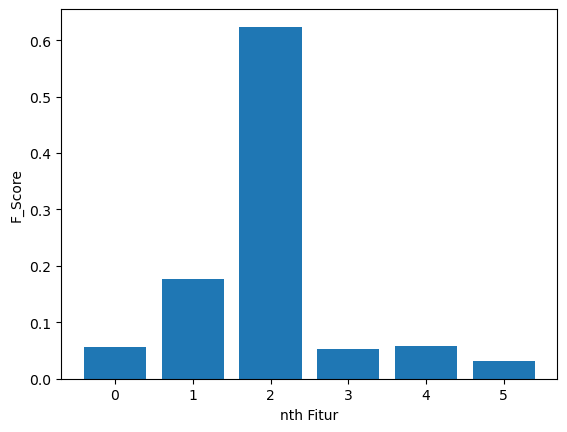

In [35]:
plt.bar(range(len(model_xgb.feature_importances_)),model_xgb.feature_importances_)
plt.xlabel("nth Fitur")
plt.ylabel("F_Score")

Bar diatas menunjukkan hasil visualisasi dari fungsi feature_importances_ milik model Xgboost. dimana fitur index ke-2 lah yang sangat berpengaruh dan dianggap penting untuk membangun model klasifikasi. fitur index kedua berarti adalah kolom Job satisfaction. lalu untuk fitur yang tidak diangap penting disini yang memiliki f_score terendah yakni fitur index ke-5 adalah kolom gender.

In [36]:
df.head()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8.51,42.51,1,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10.09,57.48,2,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18.65,41.22,2,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13.39,63.57,3,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13.36,46.16,2,bachelor/diploma,3.812226,41.454702,-81.404655,1,1
